## Data Visualization
    Project: Capstone
    Author:  Benedikt Graf
    Version: 11-22-2021

### Import Packages abd Setup Environemnt

In [1]:
import pandas as pd                     # for data handling
import numpy as np                      # for numerical methods and data structures
import latex                            # mathematical expressions  
import re                               # regular expressions
import matplotlib.pyplot as plt         # for plotting
from matplotlib import font_manager     # for advanced fonts


In [2]:
# use Goudy Old Style for figures
font_path = '/Users/bgraf/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/Goudy Old Style Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

# set global font properties
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams.update({'font.size': 22})
 
#plt.rcParams["font.family"] = "sans-serif"

### Counties Meta Table (Table 3)

In [3]:
# load two meta tables
parishes_meta = pd.read_csv("./data/geo/parishes_meta.csv")
counties_meta = pd.read_csv("./data/geo/counties_meta.csv")

# merge two meta dataframes
meta_data = pd.merge(parishes_meta, counties_meta[["lan","name"]], left_on="county", right_on="lan")

In [4]:
def geo_sum(data, unit):
    '''
    provides summary statistics on county and parish geography
    '''

    # convert square km to square miles
    if unit == "km2":
        data['area_km2'] = data['area']
        area = "area_km2"
        
    if unit == "mi2":
        data['area_mi2'] = (data['area'] * 0.386102)
        area = "area_mi2"   
     
    # collect metrics
    total = data.groupby("name")[area].sum()
    count = data.groupby("name")[area].count()
    mean = data.groupby("name")[area].mean()
    mini = data.groupby("name")[area].min()
    maxi = data.groupby("name")[area].max()

    # combine metrics
    sum_table = pd.concat((total, count, mean, mini, maxi), axis=1)
    sum_table = pd.DataFrame(sum_table)
    sum_table.columns = ['Total Area', 'Number', 'Mean Area', 'Min. Area', 'Max. Area']
    sum_table = sum_table.round({'Total Area' : 1, 'Mean Area': 1, 'Min. Area': 1, 'Max. Area': 1})
    sum_table.sort_index(inplace=True)

    return(sum_table)

In [5]:
sum_table = geo_sum(data=meta_data, unit="mi2")
sum_table

,Total Area,Number,Mean Area,Min. Area,Max. Area
name,,,,,
Blekinge,1162.6,30,38.8,2.7,160.2
Dalarnas,11607.8,54,215.0,4.2,981.1
Gotlands,1217.0,93,13.1,4.2,59.1
Gävleborgs,8113.5,50,162.3,9.3,760.6
Hallands,1905.0,91,20.9,2.7,89.2
Jämtlands,19243.7,54,356.4,5.0,2974.5
Jönköpings,4439.8,132,33.6,0.4,88.8
Kalmar,3976.5,67,59.4,3.1,167.6
Kristianstads,2489.6,146,17.1,0.8,91.5


### Parish Names by County (Reference lists for String-matching)

In [6]:
pd.set_option('display.max_rows', 500)

In [7]:
parishes_meta = pd.read_csv("./data/geo/parishes_meta.csv", index_col=0) # importing place name data
parishes_meta[parishes_meta.county == 24].sort_values(by="socken")

,geomid,nadkod,grkod,socken,from,tom,area,dedikscb,dedik,forkod,county
80,164,250671000,900,ARJEPLOG,1640,9999,14010,250671,83070,250671,24
79,162,250571002,900,ARVIDSJAUR,1640,1861,7890,250571,83060,250571,24
60,85,240301000,900,BJURHOLM,1808,9999,1378,240301,82670,240301,24
78,158,248211001,900,BURTRÄSK,1606,1918,2000,248211,83020,248211,24
64,93,240971000,900,BYGDEÅ,1799,9999,774,240971,82830,240971,24
68,102,242501001,900,DOROTEA,1795,1904,2966,242501,82534,242501,24
71,110,246304000,900,FREDRIKA,1795,9999,1191,246304,82680,246304,24
74,128,248010000,900,HOLMÖN,1802,9999,58,248010,82810,248010,24
75,134,248101005,900,LYCKSELE,1815,1847,5922,248101,82870,248101,24
77,157,248210000,900,LÖVÅNGER,0,9999,574,248210,82860,248210,24


In [8]:
parishes_stata = pd.read_stata("./data/geo/swedishparishes2.dta")
parishes_stata[parishes_stata.county == "Kopparberg"]

,county,parishname1,parish1strlen,parishname2,parish2strlen,parishname3,parish3strlen,parishnumber,long_dd,lat_dd
40,Kopparberg,Amsberg,7.0,Amsberg,7.0,Amsberg,7.0,688.0,60.533333,15.350000
81,Kopparberg,Aspeboda,8.0,Aspeboda,8.0,Aspeboda,8.0,689.0,60.566666,15.500000
88,Kopparberg,Avesta,6.0,Avesta,6.0,Avesta,6.0,690.0,60.150002,16.200001
127,Kopparberg,Bingsjö-Dådran,14.0,BingsjDdran,11.0,Bingsjo-Dadran,14.0,691.0,61.016666,15.650000
132,Kopparberg,Bjursås,7.0,Bjurss,6.0,Bjursas,7.0,692.0,60.733334,15.433333
169,Kopparberg,Boda,4.0,Boda,4.0,Boda,4.0,693.0,61.016666,15.216666
257,Kopparberg,By,2.0,By,2.0,By,2.0,694.0,60.200001,16.466667
380,Kopparberg,Enviken,7.0,Enviken,7.0,Enviken,7.0,695.0,60.799999,15.783334
411,Kopparberg,Falun,5.0,Falun,5.0,Falun,5.0,696.0,60.599998,15.633333
453,Kopparberg,Floda,5.0,Floda,5.0,Floda,5.0,697.0,60.433334,15.316667


In [9]:
parishes_stata.county.unique()

array(['Halland', 'Skaraborg', 'Stockholm', 'Jonkoping', 'Kronoberg',
       'Gotland', 'Jamtland', 'Alvsborg', 'Kalmar', 'Gavleborg',
       'Malmohus', 'Ostergotland', 'Sodermanland', 'Orebro',
       'Vasternorrland', 'Varmland', 'Vastmanland', 'Uppsala',
       'Goteborg och Bohus', 'Kopparberg', 'Kristianstad', 'Norrbotten',
       'Blekinge', 'Vasterbotten', 'Stockholm Stad', '',
       'Goteborg och Bohus ?*', 'Malmohus, Kristianstad',
       'Malmohus in CIS, but Alvsborg makes more sense'], dtype=object)

### Load Raw and Cleaned Data

In [10]:
data = pd.read_stata("./data/tocodeparish/placestocodeparish.dta")
to_query = pd.read_csv("./data/tocodeparish/cleaned_data.csv", index_col=0)
# Save a copy of orginal birthplace variable

In [11]:
# defining missing values
data["birthcountry"] = data["birthcountry"].replace({'': np.NaN, ' ': np.NaN, 'Unknown': np.NaN, "Sw":"Sweden"})
data["birthcounty"] = data["birthcounty"].replace({'': np.NaN, ' ': np.NaN, 'NA': np.NaN, 'Unknown': np.NaN})
data["ns_birthplace"] = data["ns_birthplace"].replace({'': np.NaN, ' ': np.NaN, 'NA': np.NaN, 'Unknown': np.NaN})
data["birthplace"] = data["birthplace"].replace({'': np.NaN, ' ': np.NaN, 'NA': np.NaN, 'Unknown': np.NaN})

In [12]:
# measure length of strings
data['length']  = data['ns_birthplace'].str.len()
to_query['length'] = to_query['ns_birthplace'].str.len()

### Histogram of Birthplace String Length (Figure 1)

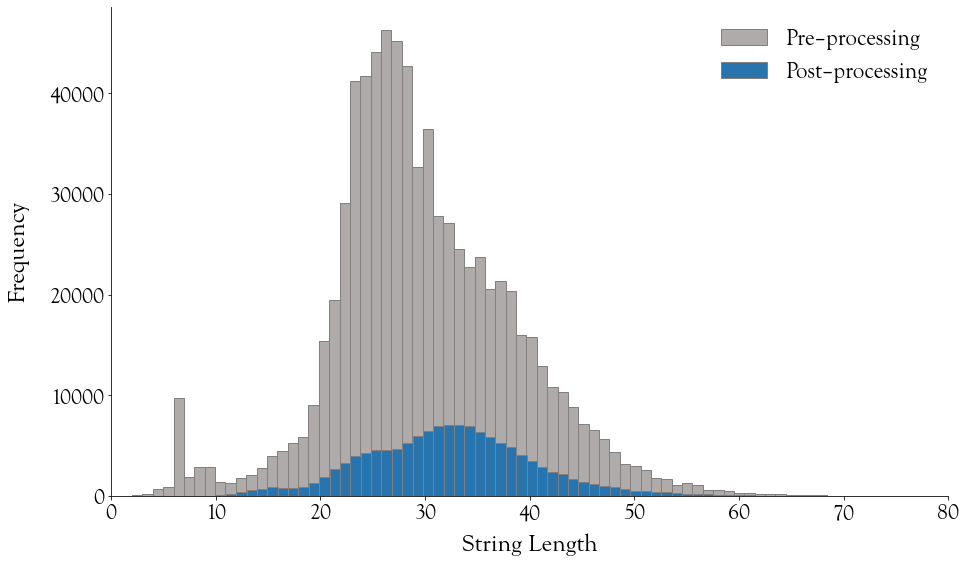

<Figure size 1440x1728 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(15, 9))

plt.figure(figsize=(20,24))

# plot two lines
l1 = ax.hist(data.length, color='#AFABAB', label="Pre–processing", bins=124, ec="grey")
l2 = ax.hist(to_query.length, color='#2774AE', label="Post–processing", bins=115, ec="grey")

# axis labels
ax.set_xlabel('String Length', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)

# axis space
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 20

# hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# add legend
ax.legend(frameon=False, fontsize = 23)
ax.set_xlim(xmin=0, xmax=80)

#ax.xaxis.set_ticks(np.arange(0, 200000, 40000))

# show plot
plt.show()